Лабораторна робота N4

Структури для роботи з великими обсягами

даних в Python

Мета: отримати навички роботи із структурами для зберігання в Python
(python, numpy, pandas, numpy array, dataframe, timeit)

Другий рівень (ускладнений)


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]
df = pd.read_csv("adult.data", names=columns, na_values=" ?", skipinitialspace=True)
print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

Поборотися із зниклими даними.

In [31]:
df[['native-country', 'occupation', 'workclass']] = df[['native-country', 'occupation', 'workclass']].replace(
    {"?": np.nan, "Unknown": np.nan, "": np.nan}
)
print(f"До очищення:\n {df.isnull().sum()}")
df_dropna = df.dropna()

# 1 спосіб
print("Після dropna():")
print(df_dropna.isnull().sum())

# 2 спосіб(Заповнюємо пропущені значення найчастішими)
for column in ['workclass', 'occupation', 'native-country']:
    most_frequent = df[column].mode()[0]
    df[column] = df[column].fillna(most_frequent)
print(f"Після очищення:\n {df.isnull().sum()}")

До очищення:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
Після dropna():
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
Після очищення:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


Пронормувати вибраний датасет або стандартизувати його

In [54]:
#Нормування для NumPy масиву
def normalize_np(arr):
    return (arr - np.min(arr, axis=0)) / (np.max(arr, axis=0) - np.min(arr, axis=0))

#Нормування для DataFrame
def normalize_df(df):
    return (df - df.min()) / (df.max() - df.min())

df_numeric = df.select_dtypes(include=[np.number])
data_np = df_numeric.to_numpy()

normalized_np = normalize_np(data_np)
normalized_df = normalize_df(df_numeric)
print("Normalized (numpy):")
print(normalized_np[:5])

print("\nNormalized (DataFrame):")
print(normalized_df.head())


Normalized (numpy):
[[0.30136986 0.0443019  0.8        0.02174022 0.         0.39795918
  0.        ]
 [0.45205479 0.0482376  0.8        0.         0.         0.12244898
  0.        ]
 [0.28767123 0.13811345 0.53333333 0.         0.         0.39795918
  0.        ]
 [0.49315068 0.15106831 0.4        0.         0.         0.39795918
  0.        ]
 [0.15068493 0.22148843 0.8        0.         0.         0.39795918
  0.        ]]

Normalized (DataFrame):
        age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000           0.0   

   hours-per-week  income_num  
0        0.397959         0.0  
1        0.122449         0.0  
2        0.397959         0.0  
3      

Згідно з результатами нормалізації, для кожної змінної в даних було виконано перетворення значень у певний діапазон (між 0 та 1 ).Це означає, що тепер всі ці змінні перебувають у однаковому діапазоні, що робить їх більш зручними для подальшого аналізу або моделювання.

Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

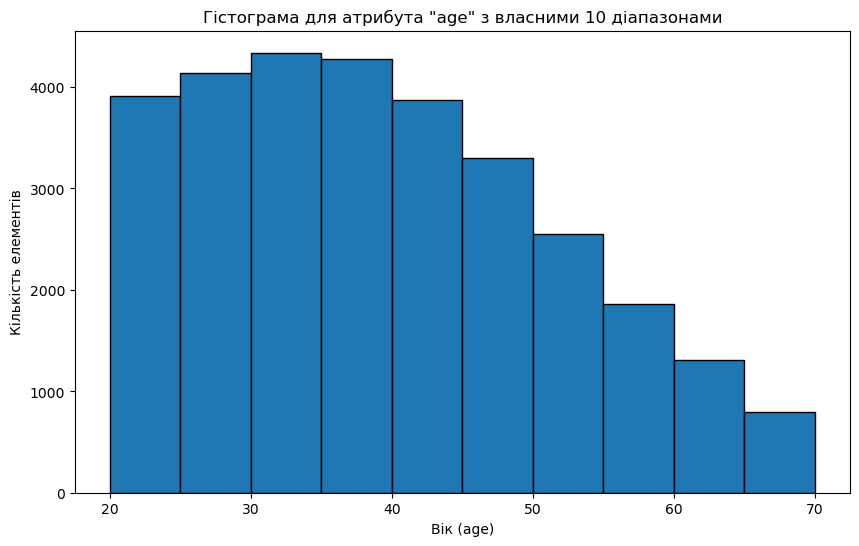

In [55]:
plt.figure(figsize=(10, 6))

# Задаємо власні межі для 10 діапазонів
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
plt.hist(df['age'], bins=bins, edgecolor='black')
plt.title('Гістограма для атрибута "age" з власними 10 діапазонами')
plt.xlabel('Вік (age)')
plt.ylabel('Кількість елементів')
plt.show()

Гістограма показує розподіл віку у вибірці, поділеному на 10 інтервалів. Найбільше людей у віці 25–40 років, після чого кількість поступово зменшується. Найменше — у віці 65–70. Дані мають зміщення вліво, тобто більшість — молодші особи.

Збудувати графік залежності одного integer/real атрибута від іншого.

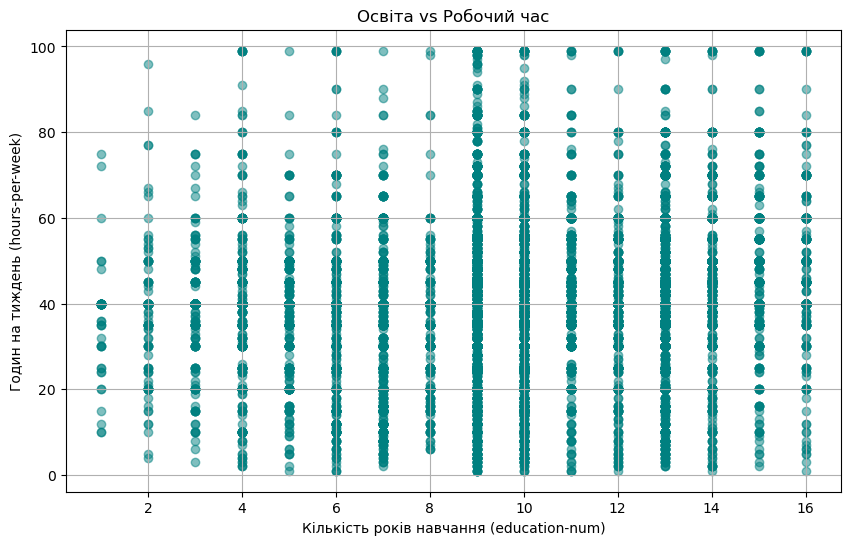

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(df['education-num'], df['hours-per-week'], alpha=0.5, color='teal')
plt.xlabel('Кількість років навчання (education-num)')
plt.ylabel('Годин на тиждень (hours-per-week)')
plt.title('Освіта vs Робочий час')
plt.grid(True)
plt.show()


Більшість людей працюють 40 год/тиждень — це помітно як вертикальні скупчення біля значення 40 на осі Y.

Освіта не сильно впливає на кількість годин — розкид годин виглядає схожим майже для всіх рівнів освіти.

Навіть при найвищій освіті (16 років) є ті, хто працює 20, 40, 60+ годин — отже, немає чіткої залежності.

Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.

In [57]:
#два числових атрибути
x = df['education-num']
y = df['hours-per-week']

#Коефіцієнт Пірсона
pearson_corr, p_pearson = pearsonr(x, y)
# Коефіцієнт Спірмена
spearman_corr, p_spearman = spearmanr(x, y)

print(f"Коефіцієнт Пірсона: {pearson_corr:.4f}, p-value: {p_pearson:.2e}")
print(f"Коефіцієнт Спірмена: {spearman_corr:.4f}, p-value: {p_spearman:.2e}")


Коефіцієнт Пірсона: 0.1481, p-value: 4.24e-159
Коефіцієнт Спірмена: 0.1672, p-value: 8.30e-203


Обчислює зв’язок між двома числовими змінними з датафрейму :

education-num — кількість років формальної освіти (або умовний рівень освіти),

hours-per-week — скільки годин на тиждень працює людина.

Коефіцієнт Пірсона: 0.1481 — це слабкий позитивний лінійний зв’язок, тобто загалом: чим вища освіта, тим трохи більше люди працюють.
Коефіцієнт Спірмена: 0.1672 — теж слабкий позитивний зв’язок, але трохи сильніший, ніж за Пірсоном. Це означає: загальна тенденція така ж — зростання одного значення відповідає зростанню іншого, навіть якщо зв’язок не ідеально лінійний

Висновок:
Люди з вищим рівнем освіти трохи частіше працюють більше годин на тиждень. Але зв’язок слабкий — є багато винятків. Обидва коефіцієнти це підтверджують, і результат є статистично значущим

Провести One Hot Encoding категоріального string атрибуту.

In [48]:
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                    'relationship', 'race', 'sex', 'native-country']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_array = encoder.fit_transform(df[categorical_cols])

encoded_cols = encoder.get_feature_names_out(categorical_cols)

encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols)

df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

#Перші 5 рядків нових закодованих даних:
print(df_encoded.head())

   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

  income  income_num  workclass_?  workclass_Federal-gov  ...  \
0  <=50K           0          0.0                    0.0  ...   
1  <=50K           0          0.0                    0.0  ...   
2  <=50K           0          0.0                    0.0  ...   
3  <=50K           0          0.0                    0.0  ...   
4  <=50K           0          0.0                    0.0  ...   

   native-country_Portugal  native-country_Puerto-Rico  \
0                      0.0                         0.0   
1                      0.0    

In [49]:
#Перевірка назви нових ознак:
print(encoded_df.columns.tolist())

['workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_?', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-insp

In [50]:
print("Форма до кодування:", df[categorical_cols].shape)
print("Форма після кодування:", encoded_df.shape)

Форма до кодування: (32561, 8)
Форма після кодування: (32561, 102)


Провести візуалізацію багатовимірних даних

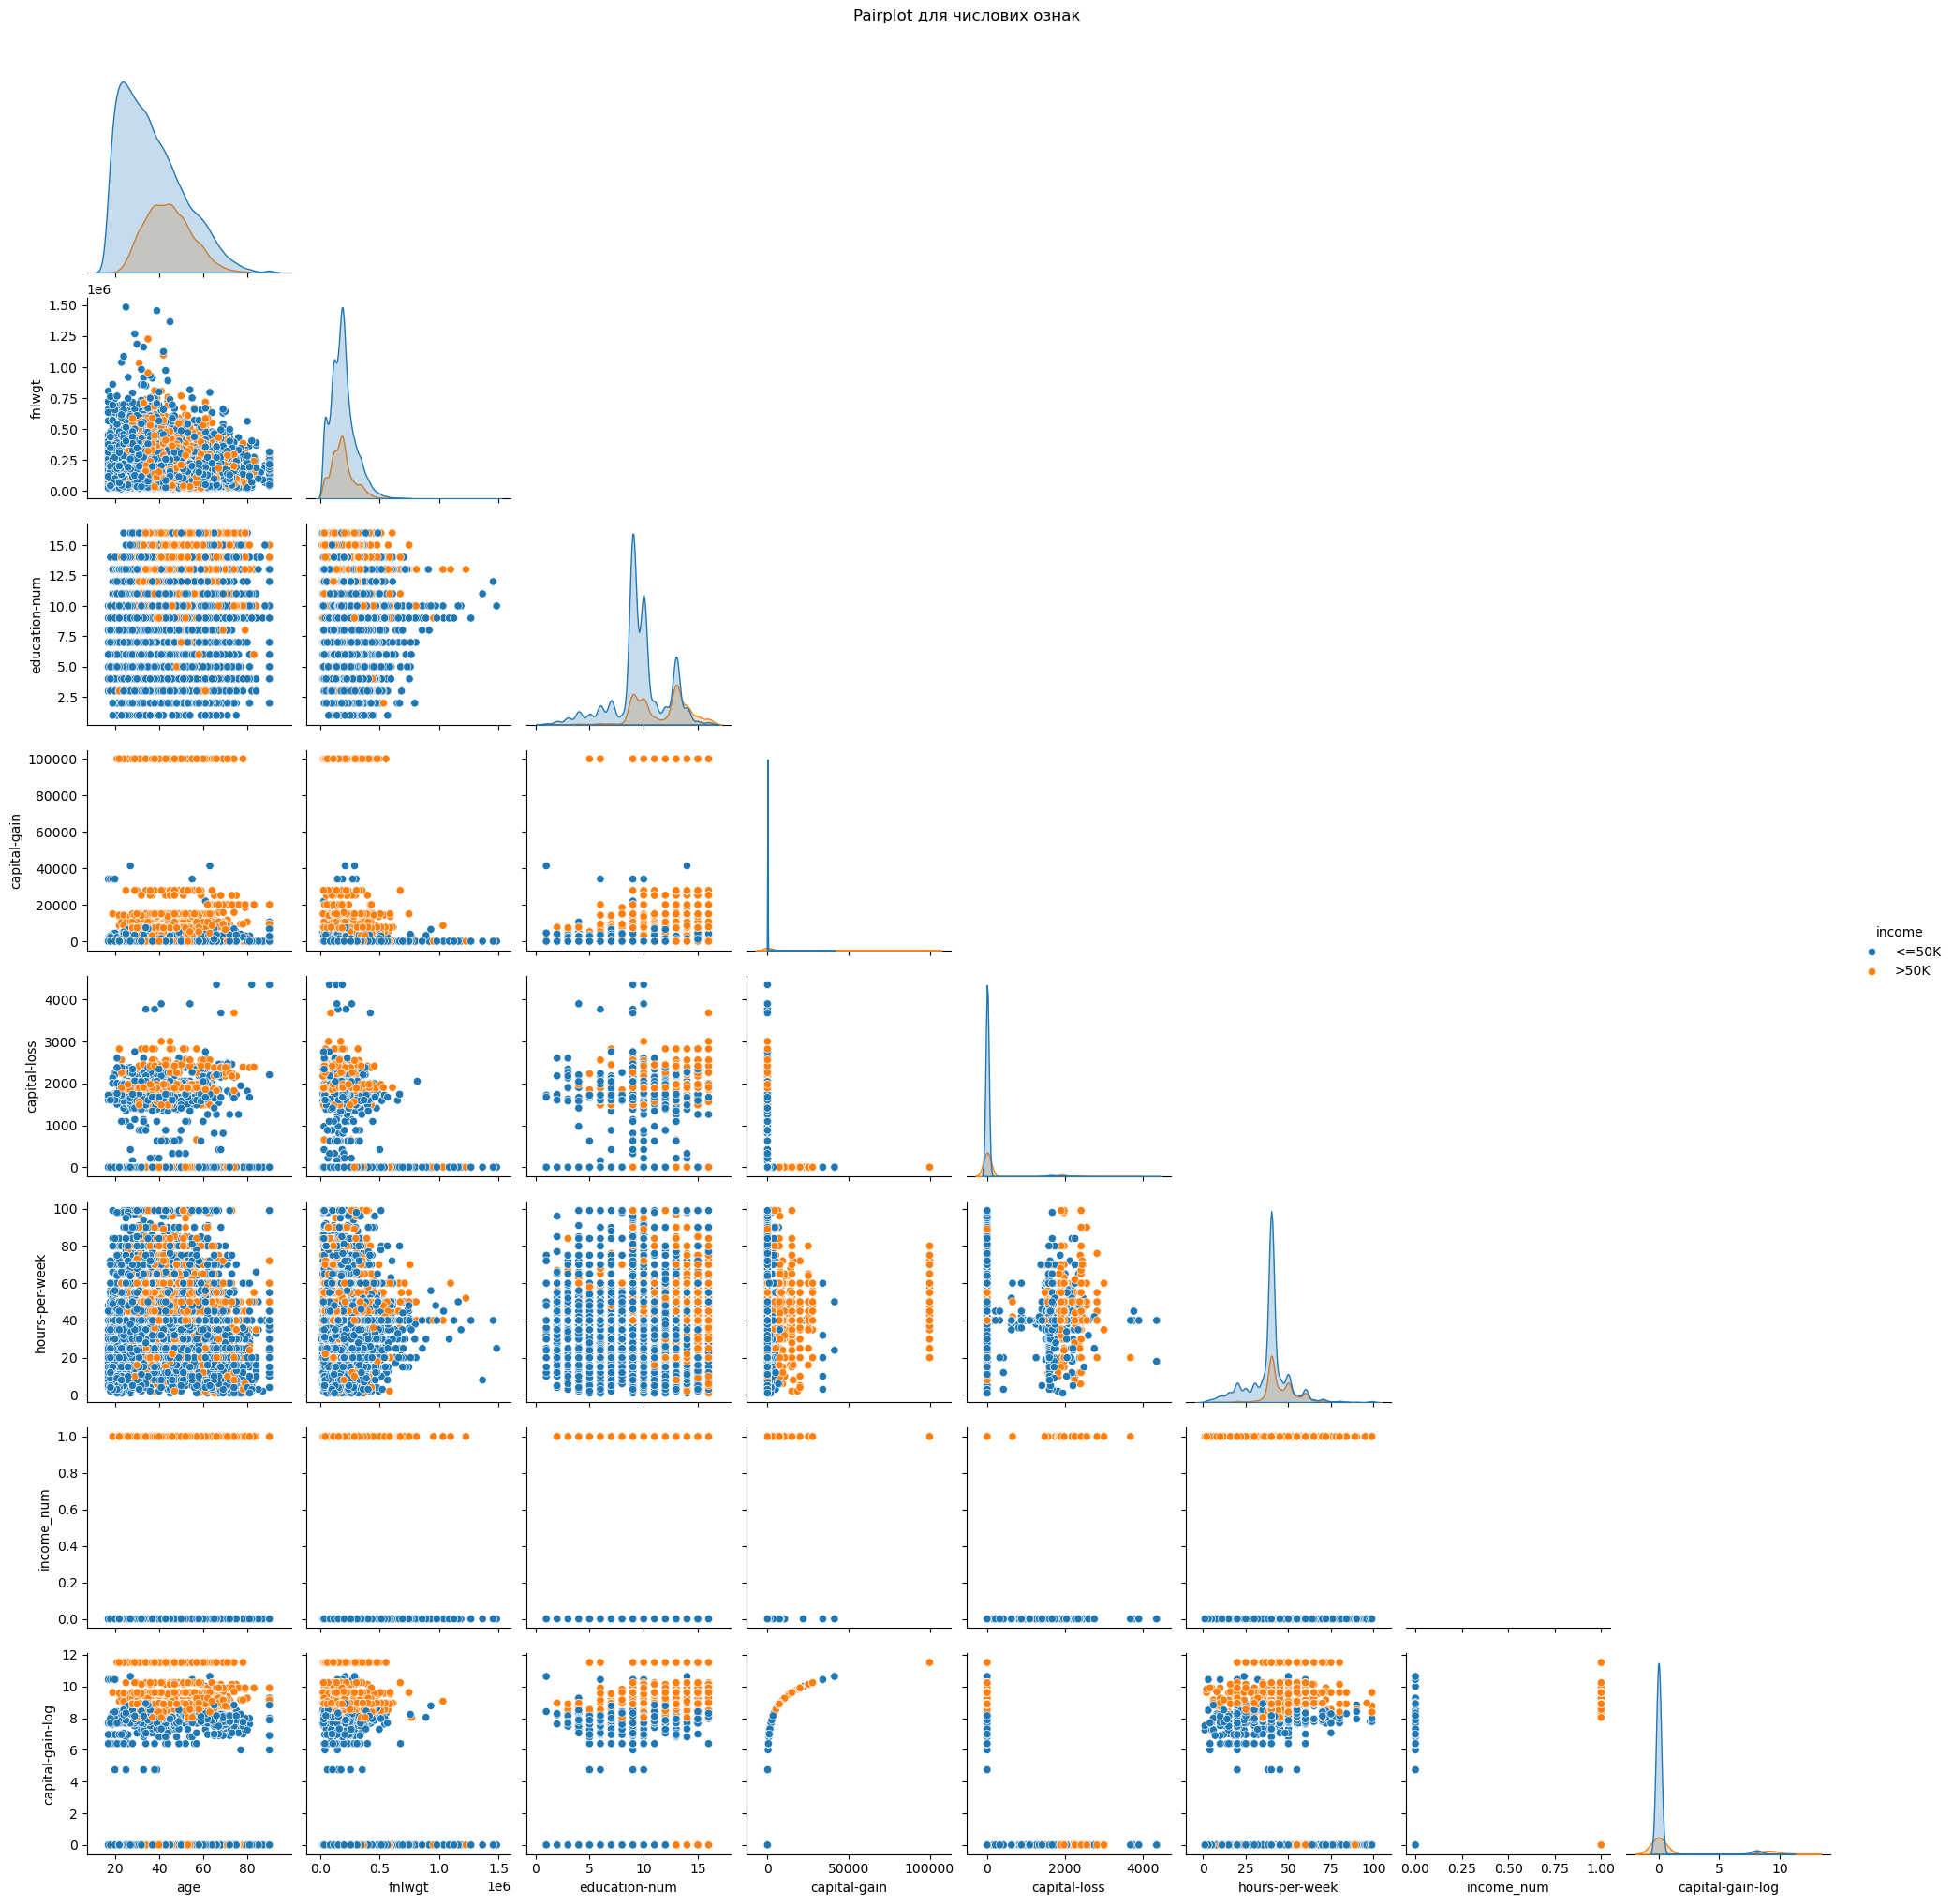

In [62]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.pairplot(numeric_df.join(df['income']), hue='income', corner=True)
plt.suptitle('Pairplot для числових ознак', y=1.02)
plt.show()

Графік Pairplot демонструє розподіли та взаємозв’язки між числовими ознаками датасету, зокрема у розрізі доходу. З нього видно, що ознаки education-num, capital-gain та hours-per-week мають певний вплив на рівень доходу: люди з вищою освітою, більшим капітальним прибутком і більше працюючі, частіше мають дохід понад 50K
